# MVP : NY Health Inspection/Demographic/Reviews Data Project
- still need reviews/census data

# ACQUISITION

## Imports used

In [1]:
%load_ext autoreload
%autoreload 2

# Imported libraries
import acquire as a
import prepare as p
import explore as e
import os
import pandas as pd

# Aquisition function that pulls data currently stored or requests the data from socrata

In [2]:
ny = p.final_ny()

In [3]:
ny

,camis,dba,boro,phone,cuisine_description,inspection_date,action,score,grade,latitude,longitude,full_address,violation_code,violation_description
0,50108113,KAUSA,Manhattan,6465970651,Peruvian,2021-12-15T00:00:00.000,Violations cited,37,C,40.763687,-73.988809,745 9 AVENUE 10019,09C 04M 02B 06C 06E 06D 08A 04N,Food contact surface not properly maintained. ...
1,50073722,ANTOYA,Manhattan,2126953131,Korean,2022-11-18T00:00:00.000,No violations,0,A,40.747630,-73.986610,37 WEST 32 STREET 10001,No violation,No violation
2,50109092,MILK & HOPS,Manhattan,2129891999,American,2022-01-25T00:00:00.000,Violations cited,32,C,40.744715,-74.002606,166 9 AVENUE 10011,02B 04A 09C 06E 06D,Hot food item not held at or above 140º F. Foo...
3,41616179,DARO'S PIZZA,Queens,7184455573,Pizza,2022-04-14T00:00:00.000,Violations cited,42,C,40.753377,-73.822170,4425 KISSENA BOULEVARD 11355,09B 02G 02I 08A 05D 04L 10F,Thawing procedures improper. Cold food item he...
4,50118431,Naomis Kosher Pizza,Queens,9292259718,Pizza,2022-04-11T00:00:00.000,Violations cited,46,C,40.732466,-73.824817,6828 MAIN ST 11367,10J 02B 05H 06C,Hand wash sign not posted Hot food item not he...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59959,50018858,NOREETUH,Manhattan,6468923050,American,2023-03-03T00:00:00.000,Violations cited,2,A,40.727365,-73.985442,128 1 AVENUE 10009,10F,Non-food contact surface or equipment made of ...
59960,50105594,HIBISCUS BREW,Brooklyn,3478243537,Coffee/Tea,2023-10-10T00:00:00.000,Violations cited,2,A,40.660730,-73.960767,546 FLATBUSH AVENUE 11225,10F,Non-food contact surface or equipment made of ...
59961,50087220,LA CASA DE FRIDA,Bronx,9145486310,Mexican,2020-01-16T00:00:00.000,Violations cited,4,A,40.872869,-73.878445,307 EAST 204 STREET 10467,10F,Non-food contact surface improperly constructe...
59962,50117836,READY PENNY INN,Queens,9179756531,American,2023-04-03T00:00:00.000,Violations cited,3,A,40.748524,-73.892640,3707 73RD ST 11372,10F,Non-food contact surface or equipment made of ...


In [4]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59964 entries, 0 to 59963
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  59964 non-null  int64  
 1   dba                    59964 non-null  object 
 2   boro                   59964 non-null  object 
 3   phone                  59964 non-null  int64  
 4   cuisine_description    59964 non-null  object 
 5   inspection_date        59964 non-null  object 
 6   action                 59964 non-null  object 
 7   score                  59964 non-null  int64  
 8   grade                  59964 non-null  object 
 9   latitude               59964 non-null  float64
 10  longitude              59964 non-null  float64
 11  full_address           59964 non-null  object 
 12  violation_code         59964 non-null  object 
 13  violation_description  59964 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.4+ 

## Removed features that were not useful:
- critical_flag
- grade_date
- record_date
- inspection_type
- community_board
- council_district
- census_tract
- bin
- nta

# PREPARATION

## Prepare function ran: retained zipode to match the demographic features (using as primary key for this join)

In [5]:
# Prep function
ny = p.final_ny()

In [6]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59964 entries, 0 to 59963
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  59964 non-null  int64  
 1   dba                    59964 non-null  object 
 2   boro                   59964 non-null  object 
 3   phone                  59964 non-null  int64  
 4   cuisine_description    59964 non-null  object 
 5   inspection_date        59964 non-null  object 
 6   action                 59964 non-null  object 
 7   score                  59964 non-null  int64  
 8   grade                  59964 non-null  object 
 9   latitude               59964 non-null  float64
 10  longitude              59964 non-null  float64
 11  full_address           59964 non-null  object 
 12  violation_code         59964 non-null  object 
 13  violation_description  59964 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.4+ 

## Cleaning actions:
- aggregated and combined informations
- Dropped many null values
- encoded matching scores with grades
- violations code and text descriptions corrected and matched appropriately

# ***Health Inspection Data*** EXPLORATORY DATA ANALYSIS

## Distribution of retrieved NY health inspection data

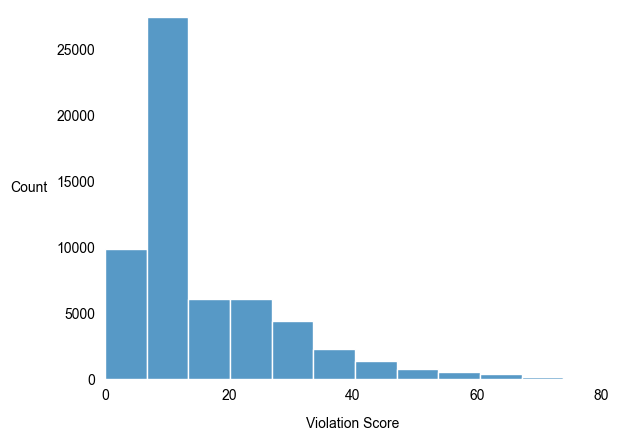

In [7]:
e.data_distribution(ny)

# Q-1. **What are the top 20 businesses in the NY Health Inspections dataset?**

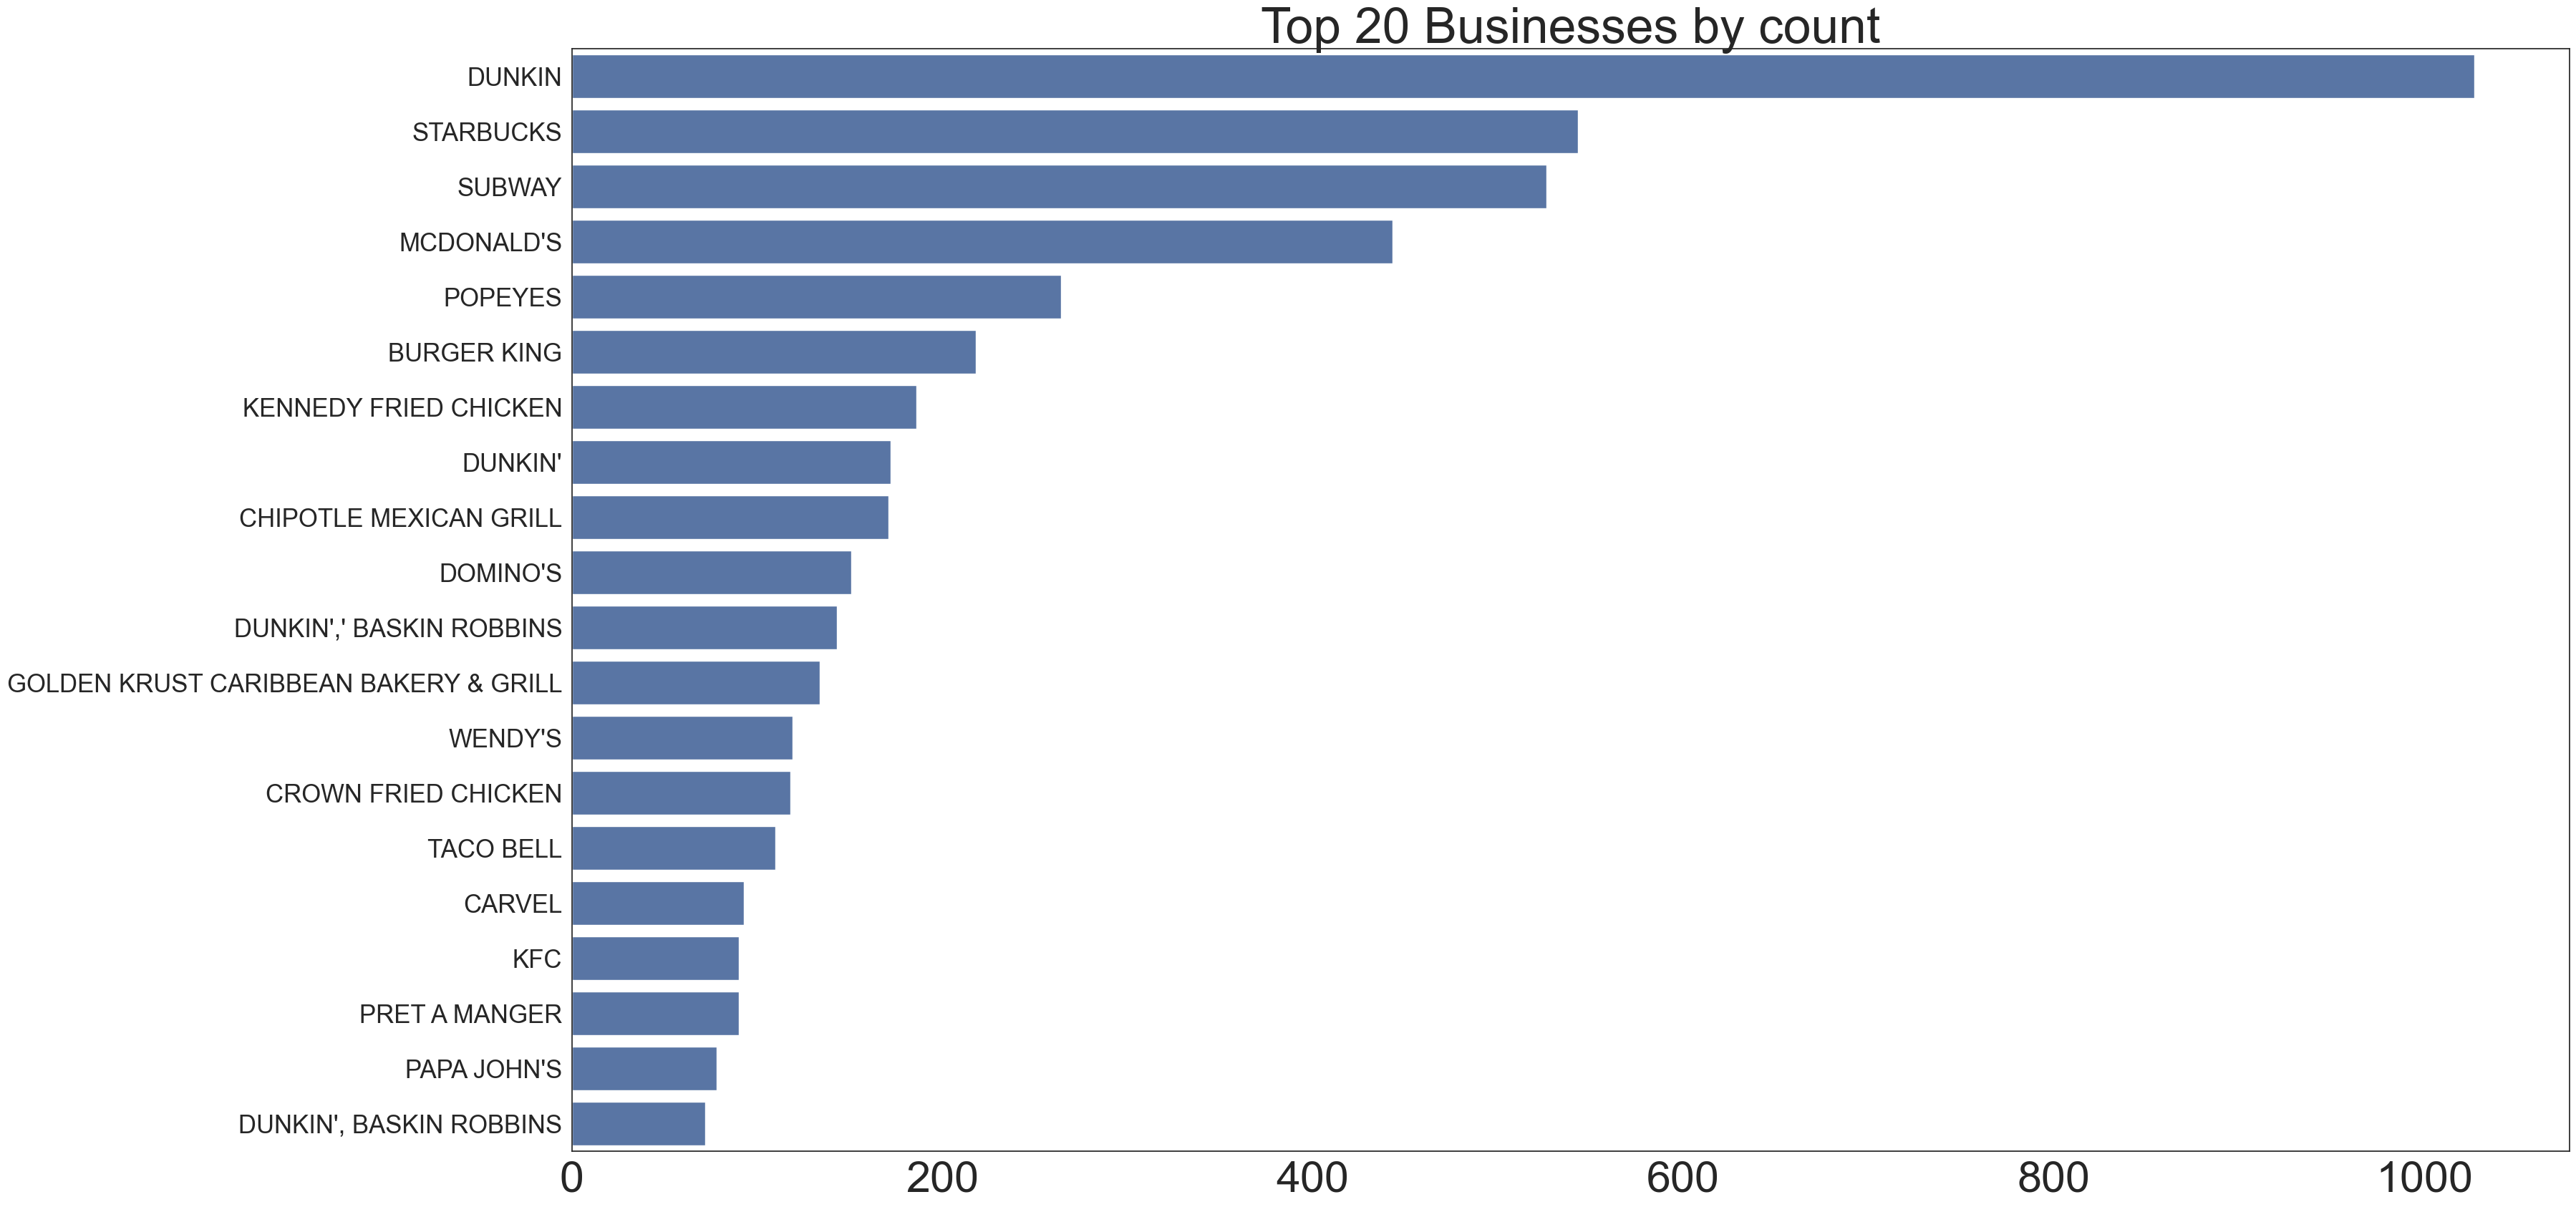

In [8]:
e.visual_1(ny)

  ## Takeaway: 
    
- **Organized by unique camis_id (unique business ids); Dunkin, Dunkin', and Dunkin'/other businesses attached or combined seems to come up the most in our top 20 listing.**

# Q-2. What were the top 20 cuisine descriptions listed on inspections?

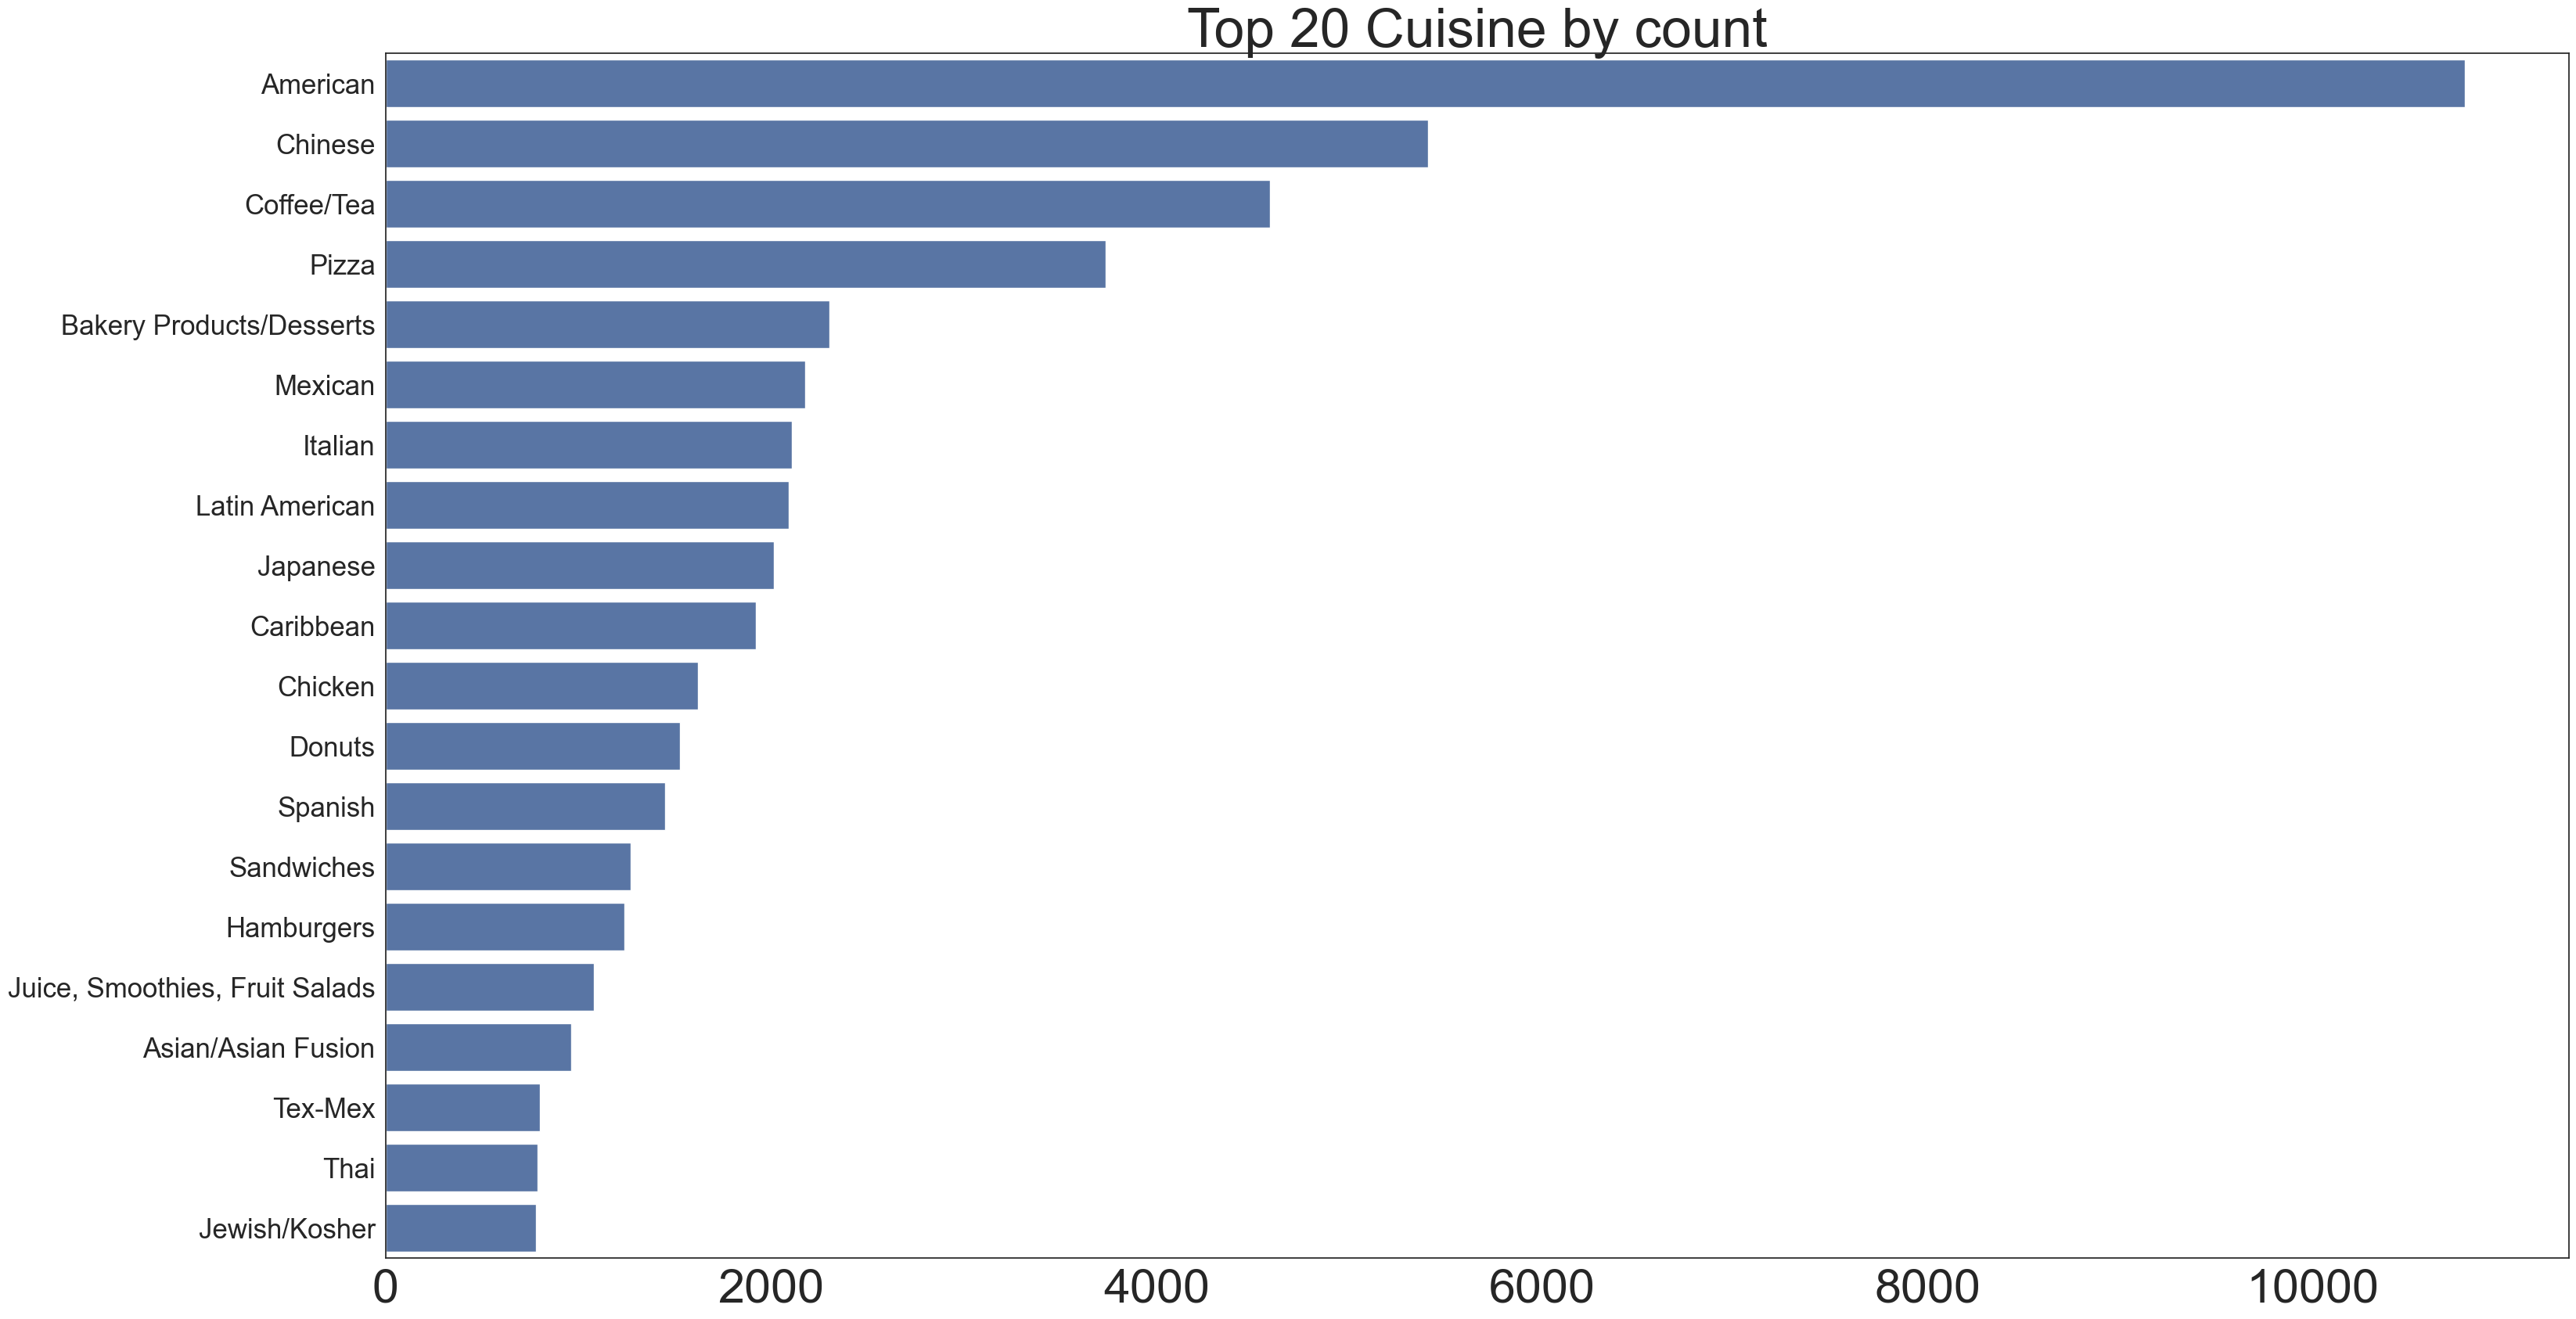

In [9]:
e.visual_2(ny)

  ## Takeaway: 
    
- **The top cuisine descriptions were annotated as American cuisine. However, it is worth noting that items such as sandwiches, hamburgers, or any single food items do not have a clear ethnic association, making this feature weak in terms of predicting grade or score outcomes.**

## Marc:

## ***After looking at the top failing scores across all boroughs and result actions taken by the health inspection we noted the biggest difference between 2 boroughs scores/outcomes decided to conduct and independent t-test to determine is there is a significant difference between the Bronx and Queens.***

# Q-3. Based on the Top 20 failing business for the Bronx and Queens, is there a significant difference between the Bronx and Queens in terms of scores received and results ending with a citation or close actions?

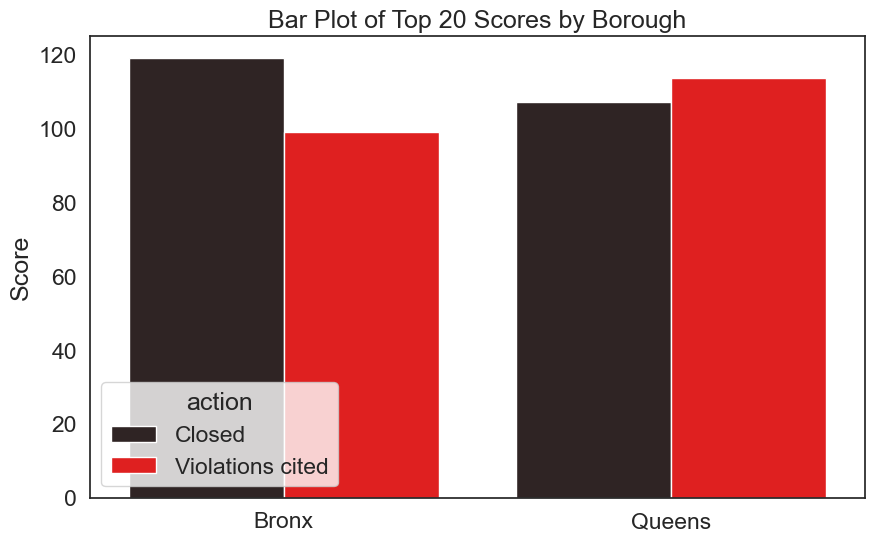



t-statistic: -1.9386185179765925

Failed to reject the null hypothesis with a P-value of 0.06000178954876174

There is no significant difference in health inspection scores between the Bronx and Queens.


In [10]:
e.visual_3(ny)

  ## Takeaway: 
    
- **At first look across five borough there seems to be a difference between the Bronx and Queens, after only comparing both boroughs we can determine there is no significant difference in health inspection scores between the Bronx and Queens**

# Q-4. Is there a correlation between health inspection scores and health inspection dates over time?

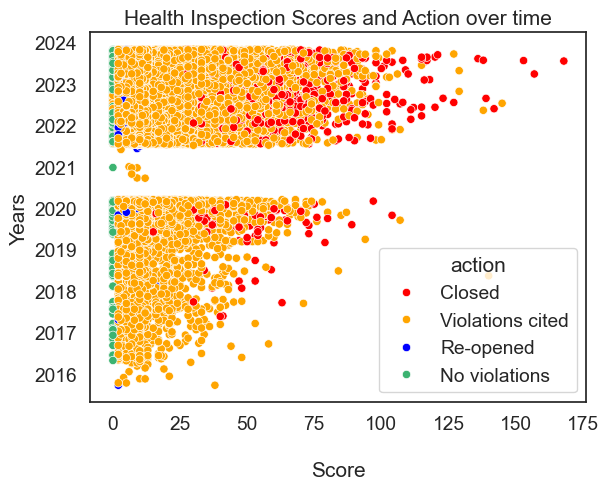



Pearson Correlation Coefficient: 0.09490122735941962

Rejected the null hypothesis with a P-value of 5.459398456211366e-120.

There is a statistically significant correlation between inspection scores and inspection dates.


In [11]:
e.visual_4(ny)

  ## Takeaway: 
    
- **There appears to be a statistical correlation between scores and inspection dates over time. We can also see how there are more closed businesses after inspection in recent time and only a handful of business seem to be re-opened after a failed inspection. These features show there may be promising results when trying to predict scores, but covid pandemic gap may lead it to not be an impactful feature for modeling.**
<br>
  
- ***Note:*** ***There is gap from 2020 to 2021 which is due to the COVID-19 Pandemic.***

## NYC Health Inspection Explore Summary:
- **Dunkin Donuts are among the highest counted businesses with health inspections.**  
- **In cuisine-description for New York is mostly composed of "American". There are descriptions without a clear ethnic association which may make this feature weak.**  
- **There is no significant difference between the top 20 businesses with high (failing scores) that were associated with a closed or violation cited action**  
- **There is a statistical correlation between health inspection scores and dates.**

## Appending additional data scraped (Reviews and Census data)

## Census dataframe work

In [12]:
# census = pd.read_csv('ny_demographic_data.csv', index_col=0)
# census.info()


In [13]:
# census.head()

In [14]:
# census = census.drop(columns='NAME')
# census = census.rename(columns={'B01003_001E' : 'total_population', 'C02003_003E' : 'caucassian', 'C02003_004E' : 'african_american', 'C02003_005E' : 'native_american', 'C02003_006E' : 'asian', 'zip code tabulation area' : 'zipcode'}) 
# census.head(2)

In [15]:
# census.zipcode.value_counts()

In [16]:
# census_zipcodes = census.zipcode

In [17]:
#ny[ny['zipcode'] != 0]

In [18]:
# ny = ny[ny['zipcode'] != 0]
# ny.zipcode.value_counts()

In [19]:
# unique_zipcodes_list = ny['zipcode'].unique().tolist()
# len(unique_zipcodes_list)

In [20]:
# ny.zipcode.drop_duplicates()

In [21]:
# health_zipcodes = ny.zipcode

In [22]:
# unique_health_zipcodes = health_zipcodes[~health_zipcodes.isin(census_zipcodes)]
# unique_census_zipcodes = census_zipcodes[~census_zipcodes.isin(health_zipcodes)]


In [23]:
# unique_health_zipcodes.value_counts()

In [24]:
# unique_census_zipcodes

In [25]:
# 220 - 197

# Modeling

In [1]:
import acquire as a
import prepare as p
import model as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ny_reviews = p.acquire_ny_reviews()

ny_reviews.csv found!


In [3]:
ny_reviews = ny_reviews.dropna()

In [4]:
ny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  2594 non-null   int64  
 1   dba                    2594 non-null   object 
 2   boro                   2594 non-null   object 
 3   phone                  2594 non-null   int64  
 4   inspection_date        2594 non-null   object 
 5   latitude               2594 non-null   float64
 6   longitude              2594 non-null   float64
 7   cuisine_description    2594 non-null   object 
 8   action                 2594 non-null   object 
 9   score                  2594 non-null   int64  
 10  grade                  2594 non-null   object 
 11  full_address           2594 non-null   object 
 12  violation_code         2594 non-null   object 
 13  violation_description  2594 non-null   object 
 14  last_inspection_date   2594 non-null   object 
 15  avg_

In [5]:
ny_reviews.columns.to_list()

['camis',
 'dba',
 'boro',
 'phone',
 'inspection_date',
 'latitude',
 'longitude',
 'cuisine_description',
 'action',
 'score',
 'grade',
 'full_address',
 'violation_code',
 'violation_description',
 'last_inspection_date',
 'avg_service',
 'avg_atmosphere',
 'avg_food',
 'avg_price',
 'reviews_sw',
 'reviews',
 'neg',
 'neu',
 'pos',
 'compound']

In [6]:
ny_reviews.grade.value_counts()

grade
A    1430
B     665
C     499
Name: count, dtype: int64

In [7]:
grademap = {'A': 'Pass', 'B': 'Pass', 'C': 'Fail'}

ny_reviews = ny_reviews.rename(columns={'neg' : 'negative',
                                        'neu' : 'neutral',
                                        'pos' : 'positive',})

ny_reviews['grade'] = ny_reviews['grade'].map(grademap)

In [8]:
ny_reviews = ny_reviews[['grade', 'avg_service', 'avg_atmosphere', 'avg_food', 'avg_price', 'reviews', 'negative', 'neutral', 'positive', 'compound']]

In [9]:
ny_reviews.head()

,grade,avg_service,avg_atmosphere,avg_food,avg_price,reviews,negative,neutral,positive,compound
0,Pass,5.000000,5.000000,5.0,60.612245,horrible food slow service seafood paella tast...,0.084,0.673,0.244,0.9975
1,Pass,5.000000,5.000000,5.0,60.612245,superb havent good paella since moving back ny...,0.041,0.630,0.330,0.9998
2,Pass,5.000000,5.000000,5.0,60.612245,gem ocano nyc spanish dish old school spanish ...,0.055,0.581,0.365,1.0000
3,Fail,4.333333,4.333333,4.5,17.692308,authentic place point needed lot help managed ...,0.060,0.688,0.252,0.7717
4,Pass,4.333333,4.333333,4.5,17.692308,really great classic chinese comfort food grea...,0.000,0.537,0.463,0.9468


In [10]:
ny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   grade           2594 non-null   object 
 1   avg_service     2594 non-null   float64
 2   avg_atmosphere  2594 non-null   float64
 3   avg_food        2594 non-null   float64
 4   avg_price       2594 non-null   float64
 5   reviews         2594 non-null   object 
 6   negative        2594 non-null   float64
 7   neutral         2594 non-null   float64
 8   positive        2594 non-null   float64
 9   compound        2594 non-null   float64
dtypes: float64(8), object(2)
memory usage: 202.8+ KB


In [11]:
ny_reviews.columns.to_list()

['grade',
 'avg_service',
 'avg_atmosphere',
 'avg_food',
 'avg_price',
 'reviews',
 'negative',
 'neutral',
 'positive',
 'compound']

# Predicting Fail
-------

# Baseline Model 

In [1]:
import model as m
import pandas as pd
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [2]:
m.baseline()


Baseline Model

Train Accuracy: 55.43%


Validation Accuracy: 57.07%



# Logistic Regression Model

In [3]:
m.model_1()


Logistic Regression Model

Train Accuracy: 0.82


Validation Accuracy: 0.54


Classification Report for Training Set:

              precision    recall  f1-score   support

        Fail       0.87      0.72      0.79       809
        Pass       0.80      0.91      0.85      1006

    accuracy                           0.82      1815
   macro avg       0.83      0.81      0.82      1815
weighted avg       0.83      0.82      0.82      1815





Classification Report for Validation Set:

              precision    recall  f1-score   support

        Fail       0.46      0.40      0.43       167
        Pass       0.59      0.65      0.62       222

    accuracy                           0.54       389
   macro avg       0.53      0.52      0.52       389
weighted avg       0.54      0.54      0.54       389




# KNN Classifier

In [2]:
m.model_2()

ValueError: Found input variables with inconsistent numbers of samples: [9, 1815]

# XGBClassifier (Hyperparameters)

In [ ]:
m.model_3()

# Logistic Regression (Hyperparameters)

In [ ]:
m.model_4()

# Random Forest / Gradient Boosting

In [ ]:
import model as m
m.model_5()